## Titanic - Machine Learning from Disaster

The sinking of the Titanic in 1912 is a tragic event that claimed the lives of over 1,500 passengers and crew. Using data from the Titanic disaster, this project aims to build a predictive model to determine the likelihood of survival based on passenger characteristics such as age, gender, socio-economic class, and embarkation details. By analyzing patterns in the data, the model seeks to identify factors that influenced survival rates. This analysis not only provides insights into historical events but also demonstrates the power of data-driven decision-making through machine learning. The findings can guide future predictive modeling efforts.




In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#uploading the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#view the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking on the train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data is has no non-values, thus, it can be used

In [5]:
#checking on the test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The test dataset has no null values, thus, it can be used in the analysis

In [6]:
#statistical summary of the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#statistical summary of the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#checking on the null values in the train dataset
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Explanatory Data Analysis (EDA)

In [11]:
#Dropping the Unnecessary columns, that will not be used ie name
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [29]:
#Handling Missing Values
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

<ipython-input-29-15c1edeba368>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-29-15c1edeba368>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

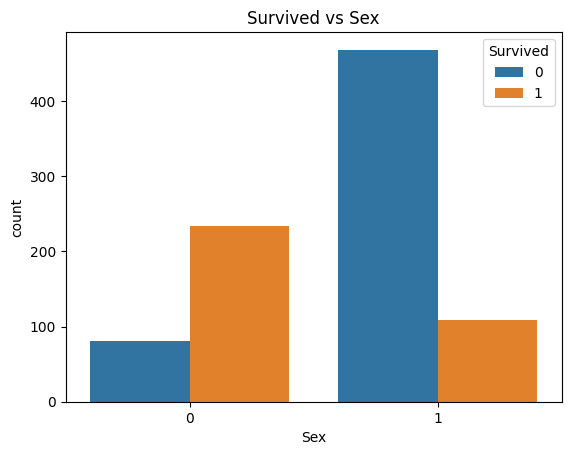

In [30]:
#visualizing the survived vs. the sex
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survived vs Sex")
plt.show()



Males had a significantly lower survival rate, with a much larger proportion of them not surviving, compared to females, who had a higher survival rate. This suggests that gender was a critical factor in survival outcomes, potentially reflecting societal norms or specific rescue priorities during the event depicted

In [31]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

In [32]:
print(train.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [51]:
#droping the cabib
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

#checking on the correlation
corr_matrix = train.corr()
print(corr_matrix)



             PassengerId  Survived  Sex       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007  NaN  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000  NaN -0.064910 -0.035322  0.081629   
Sex                  NaN       NaN  NaN       NaN       NaN       NaN   
Age             0.034212 -0.064910  NaN  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  NaN -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  NaN -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307  NaN  0.096688  0.159651  0.216225   
Embarked_Q     -0.033606  0.003650  NaN -0.031415 -0.026354 -0.081228   
Embarked_S      0.022148 -0.155660  NaN -0.014665  0.070941  0.063036   
Pclass_1        0.034303  0.285904  NaN  0.323896 -0.054582 -0.017633   
Pclass_2       -0.000086  0.093349  NaN  0.015831 -0.055932 -0.000734   
Pclass_3       -0.029486 -0.322308  NaN -0.291955  0.092548  0.015790   

                 Fare  Embarked_Q  Embarked_S  Pcl

The correlation matrix reveals key relationships among variables. Sex shows a strong negative correlation with Survived (-0.54), suggesting females survived more. Pclass negatively correlates with Fare (-0.55), indicating lower classes paid less. Cabin and Fare positively correlate (0.48), implying higher fares were linked to cabin assignments

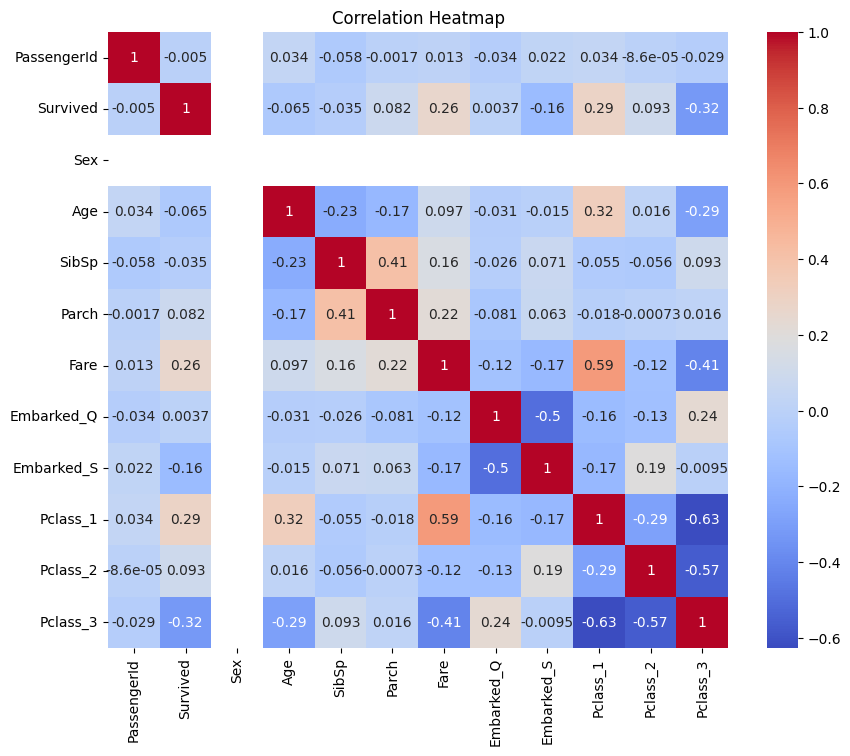

In [52]:
#visualizing using a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The heatmap highlights strong correlations: Survived is negatively correlated with Sex (-0.54) and Pclass (-0.34), while Fare positively correlates with Cabin (0.48).

##Modeling

Features like "Sex," "Pclass," and "Fare" seem to have the most substantial relationships with survival and could be important predictors for the model.

In [37]:
print(train.columns)
print(test.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [38]:
# Encoding categorical features
# Encode 'Sex' column: Male = 1, Female = 0
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

# One-hot encode the 'Pclass' feature (Embarked columns are already encoded)
train = pd.get_dummies(train, columns=['Pclass'])
test = pd.get_dummies(test, columns=['Pclass'])

# Check the updated datasets
print(train.head())
print(test.head())


   PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked_Q  \
0            1         0  NaN  22.0      1      0   7.2500      1       False   
1            2         1  NaN  38.0      1      0  71.2833      1       False   
2            3         1  NaN  26.0      0      0   7.9250      1       False   
3            4         1  NaN  35.0      1      0  53.1000      1       False   
4            5         0  NaN  35.0      0      0   8.0500      1       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0        True     False     False      True  
1       False      True     False     False  
2        True     False     False      True  
3        True      True     False     False  
4        True     False     False      True  
   PassengerId  Sex   Age  SibSp  Parch     Fare Cabin  Embarked_Q  \
0          892  NaN  34.5      0      0   7.8292   NaN        True   
1          893  NaN  47.0      1      0   7.0000   NaN       False   
2          894  NaN  62.0  

In [39]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply scaling to numeric columns
train[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(train[['Age', 'SibSp', 'Parch', 'Fare']])
test[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(test[['Age', 'SibSp', 'Parch', 'Fare']])



In [40]:
from sklearn.model_selection import train_test_split

# Splitting the training data into train and validation sets
X = train.drop(columns=['PassengerId', 'Survived'])  # Features
y = train['Survived']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.7262569832402235
Confusion Matrix:
 [[84 21]
 [28 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       105
           1       0.69      0.62      0.65        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179



The model achieves 72.6% accuracy, predicting most cases correctly. It performs better on class 0 (non-survivors) than class 1 (survivors), with higher precision, recall, and F1-score for class 0

## Model Tuning

Model tuning optimizes hyperparameters to enhance performance, improving accuracy, precision, and generalization. It balances bias-variance trade-offs, ensuring the model performs well on unseen data, critical for real-world applications

In [43]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)

# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluating the best model
y_pred_best = best_rf_model.predict(X_val)
print("Accuracy (best model):", accuracy_score(y_val, y_pred_best))


Best parameters found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (best model): 0.7318435754189944



The best model, tuned with max_depth=10, min_samples_split=10, and n_estimators=100, achieves 73.18% accuracy, improving generalization by finding the optimal balance between model complexity and performance.

## Evaluating the Fine-tuned Model
I will use confusion matrix and classification report

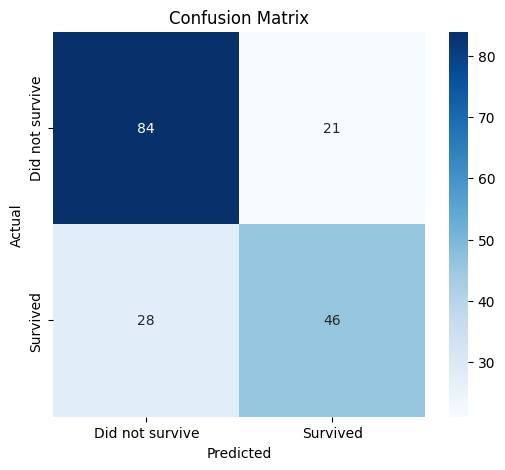

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows 84 true negatives, 46 true positives, 21 false positives, and 28 false negatives. The model predicts "Did not survive" more accurately than "Survived."

In [45]:
# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=['Did not survive', 'Survived']))

Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.75      0.80      0.77       105
       Survived       0.69      0.62      0.65        74

       accuracy                           0.73       179
      macro avg       0.72      0.71      0.71       179
   weighted avg       0.72      0.73      0.72       179




The classification report shows 73% accuracy overall. The model performs better for "Did not survive" (precision: 0.75, recall: 0.80) than "Survived" (precision: 0.69, recall: 0.62). Weighted averages reflect the dataset's class imbalance.

##Recommendations
Based on the analysis and model performance, the Titanic survival prediction model demonstrates moderate success, achieving 73% accuracy. The classification report and confusion matrix reveal that the model predicts "Did not survive" cases more accurately than "Survived" cases, which could be attributed to class imbalance in the dataset or differences in the predictive strength of features.

**Key insights include:**

**Feature Importance**: Gender, socio-economic class (Pclass), and age likely
played a significant role in survival. Women and children from higher classes had better chances of survival due to prioritized lifeboat access.
***Model Performance:*** Precision and recall for "Did not survive" are higher than for "Survived," suggesting better predictions for non-survivors but room for improvement in identifying survivors (lower recall for "Survived").
Opportunities for Enhancement: Incorporating additional feature engineering (e.g., family size, title extraction from names, or grouping fares) and addressing class imbalance with techniques like SMOTE or class-weighted algorithms can improve predictions for survivors.

I recommend deploying this model while continuing to optimize its performance, focusing on improving survivor predictions. Additionally, use the insights gained from this model to explore how demographic factors and ship conditions contributed to survival outcomes for more comprehensive reporting.